# Importing required libraries

In [41]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("/Users/ujwal/Downloads/pokemon 2/"))
import pandas as pd

['Zapdos', 'Kadabra', "Farfetch'd", 'Omanyte', 'Shellder', 'Bellsprout', 'Eevee', 'Jolteon', 'Hypno', 'Seel', 'Zubat', 'Graveler', 'Magneton', 'Abra', 'Kingler', 'Alakazam', 'Clefable', 'Gyarados', 'Poliwag', 'Rapidash', 'Machamp', 'Pinsir', 'Muk', 'Seaking', 'Magikarp', 'Goldeen', 'Venusaur', 'Flareon', 'Jigglypuff', 'Doduo', 'Weedle', 'Vileplume', 'Arcanine', 'Tentacruel', 'Gloom', 'Charmeleon', 'Articuno', 'Sandshrew', 'Spearow', 'Marowak', 'Clefairy', 'Mr. Mime', 'Snorlax', 'Scyther', 'Primeape', 'Diglett', 'Onix', 'Mankey', 'Rattata', 'Voltorb', 'Gengar', 'Gastly', 'Cloyster', 'Weepinbell', 'Dragonair', 'Squirtle', 'Pikachu', 'Victreebel', 'Charmander', 'Staryu', 'Venonat', 'Vaporeon', 'Ivysaur', 'Krabby', 'Drowzee', 'NidoranF', 'Sandslash', 'Kangaskhan', 'Chansey', 'Butterfree', 'Starmie', 'Magmar', 'Beedrill', 'Ninetales', 'Magnemite', 'Metapod', 'Electrode', 'Raichu', 'Fearow', 'Mewtwo', 'Kabuto', 'Pidgeotto', 'Hitmonchan', 'Blastoise', 'Weezing', 'Golbat', 'Seadra', 'Rhyhorn',

In [34]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/Users/ujwal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [36]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam

In [9]:
!pip install opencv-python


    100% |████████████████████████████████| 48.7MB 716kB/s eta 0:00:01    66% |█████████████████████▍          | 32.5MB 51.6MB/s eta 0:00:01


In [10]:
import os # Handle working with files and directories
import cv2
import PIL
from PIL import Image
# Allow very large images to load
PIL.Image.MAX_IMAGE_PIXELS = 933120000
import matplotlib.pyplot as plt

In [11]:
pokemon_dir = '/Users/ujwal/Downloads/pokemon 2/'

#### Adding code for:
- Image Conversion
- Resizing of the image to 128,128
- Normalizing the images
- Plotting the normalized image

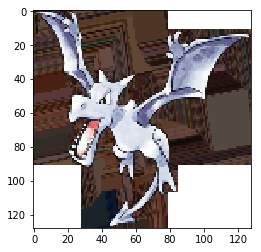

In [23]:
# Convert an image to a jpeg
def convert_to_jpg(img_path):
    # Convert png to jpeg
    img = Image.open(img_path)
    if img.mode == 'RGBA':
        img.load()
        background = Image.new("RGB", img.size, (0,0,0))
        background.paste(img, mask=img.split()[3])
        img = np.array(background)
    else:
        img = img.convert('RGB')
        img = np.array(img)
    
    return img
        
# Resize image to 128x128
def resize_img(img):
    img = cv2.resize(img, (128,128))
    return img

# Normalize pixel values from -1 to 1, important when utilizing NNs
def normalize_img(img):
    return np.array((img - np.min(img)) / (np.max(img) - np.min(img)))
#     img = img / 127.5 - 1
#     return img

# Open an image, convert to jpeg, resize if needed
def open_convert(img_path):
    # png
    if img_path[-4:] == '.png':
        img = convert_to_jpg(img_path)
    # jpeg, etc.
    else:
        img = Image.open(img_path)
        img = img.convert('RGB')
        img = np.array(img)

        
    # Convert to 128x128
    img = resize_img(img)
    
    # Normalize img
    img = normalize_img(img)
    
    # Return resized img
    return img
# Test
img = open_convert('/Users/ujwal/Downloads/pokemon 2/Aerodactyl/00000048.png~original')
# img = Image.fromarray(img, 'RGB')
# img.save('my.png')
plt.imshow(img)
plt.show()

#### Creating Image Data and labels

In [24]:
# Contain images and labels
images = []
labels = []

# How many images per pokemon to load
images_per_pokemon = 15

# Keep track of current iteration
count = 0
# Iterate through each pokemon folder
for pkmn in os.listdir(pokemon_dir):
    pkmn_dir = os.path.join(pokemon_dir, pkmn)
    
    # Current number of images loaded for this pokemon
    curr_imgs = 0
    
    # Add each image to the list, use most relevant search results
    for img in sorted(os.listdir(pkmn_dir)):
        # Attempt to add image and label to list
        try:
            images.append(open_convert(os.path.join(pkmn_dir, img)))
            labels.append(pkmn)
        # Ignore garbage images
        except (ValueError, OSError):
            continue
        count += 1
        # Some visualization for time spent loading
        if count % 1000 == 0:
            print('Current iteration: ' + str(count))            
        # Increment num images loaded
        curr_imgs += 1
        if curr_imgs >= images_per_pokemon:
            break

/Users/ujwal/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Current iteration: 1000
Current iteration: 2000


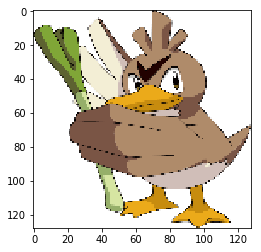

In [67]:
plt.imshow(images[30])
plt.show()

In [33]:
img_data = np.array(images)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

(2265, 128, 128, 3)


In [42]:
int_list = pd.factorize(labels)

In [48]:
int_list[1]

array(['Zapdos', 'Kadabra', "Farfetch'd", 'Omanyte', 'Shellder',
       'Bellsprout', 'Eevee', 'Jolteon', 'Hypno', 'Seel', 'Zubat',
       'Graveler', 'Magneton', 'Abra', 'Kingler', 'Alakazam', 'Clefable',
       'Gyarados', 'Poliwag', 'Rapidash', 'Machamp', 'Pinsir', 'Muk',
       'Seaking', 'Magikarp', 'Goldeen', 'Venusaur', 'Flareon',
       'Jigglypuff', 'Doduo', 'Weedle', 'Vileplume', 'Arcanine',
       'Tentacruel', 'Gloom', 'Charmeleon', 'Articuno', 'Sandshrew',
       'Spearow', 'Marowak', 'Clefairy', 'Mr. Mime', 'Snorlax', 'Scyther',
       'Primeape', 'Diglett', 'Onix', 'Mankey', 'Rattata', 'Voltorb',
       'Gengar', 'Gastly', 'Cloyster', 'Weepinbell', 'Dragonair',
       'Squirtle', 'Pikachu', 'Victreebel', 'Charmander', 'Staryu',
       'Venonat', 'Vaporeon', 'Ivysaur', 'Krabby', 'Drowzee', 'NidoranF',
       'Sandslash', 'Kangaskhan', 'Chansey', 'Butterfree', 'Starmie',
       'Magmar', 'Beedrill', 'Ninetales', 'Magnemite', 'Metapod',
       'Electrode', 'Raichu', 'Fearow

In [45]:
int_list2= int_list[0]

In [52]:
len(int_list2)

2265

In [57]:
int_list2[2264]

150

In [58]:
num_classes = 151

In [68]:
names = int_list[1]

In [69]:
names

array(['Zapdos', 'Kadabra', "Farfetch'd", 'Omanyte', 'Shellder',
       'Bellsprout', 'Eevee', 'Jolteon', 'Hypno', 'Seel', 'Zubat',
       'Graveler', 'Magneton', 'Abra', 'Kingler', 'Alakazam', 'Clefable',
       'Gyarados', 'Poliwag', 'Rapidash', 'Machamp', 'Pinsir', 'Muk',
       'Seaking', 'Magikarp', 'Goldeen', 'Venusaur', 'Flareon',
       'Jigglypuff', 'Doduo', 'Weedle', 'Vileplume', 'Arcanine',
       'Tentacruel', 'Gloom', 'Charmeleon', 'Articuno', 'Sandshrew',
       'Spearow', 'Marowak', 'Clefairy', 'Mr. Mime', 'Snorlax', 'Scyther',
       'Primeape', 'Diglett', 'Onix', 'Mankey', 'Rattata', 'Voltorb',
       'Gengar', 'Gastly', 'Cloyster', 'Weepinbell', 'Dragonair',
       'Squirtle', 'Pikachu', 'Victreebel', 'Charmander', 'Staryu',
       'Venonat', 'Vaporeon', 'Ivysaur', 'Krabby', 'Drowzee', 'NidoranF',
       'Sandslash', 'Kangaskhan', 'Chansey', 'Butterfree', 'Starmie',
       'Magmar', 'Beedrill', 'Ninetales', 'Magnemite', 'Metapod',
       'Electrode', 'Raichu', 'Fearow

In [70]:
my_labels = int_list2

In [71]:
my_labels

array([  0,   0,   0, ..., 150, 150, 150])

In [73]:
Y = np_utils.to_categorical(my_labels, num_classes)

In [75]:
Y.shape

(2265, 151)

### Splitting the data into training and testing sets

In [76]:
x, y = shuffle(img_data, Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [77]:
input_shape = img_data[0].shape
print(input_shape)

(128, 128, 3)


### Building a CNN model

In [87]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(151))  # Last Dense input is used to specify the number of classes to predict
model.add(Activation("softmax"))

model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 42, 42, 64)        0         
__________

In [88]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
                 verbose=1, validation_data=(X_test, y_test))

Train on 1812 samples, validate on 453 samples
Epoch 1/20
1812/1812 [==============================] - 135s 74ms/step - loss: 6.1460 - acc: 0.0199 - val_loss: 5.1110 - val_acc: 0.0265
Epoch 2/20
1812/1812 [==============================] - 131s 72ms/step - loss: 4.9068 - acc: 0.0486 - val_loss: 4.4940 - val_acc: 0.0751
Epoch 3/20
1812/1812 [==============================] - 129s 71ms/step - loss: 3.9123 - acc: 0.1672 - val_loss: 4.0312 - val_acc: 0.1413
Epoch 4/20
1812/1812 [==============================] - 128s 71ms/step - loss: 3.2974 - acc: 0.2572 - val_loss: 3.8669 - val_acc: 0.1611
Epoch 5/20
1812/1812 [==============================] - 129s 71ms/step - loss: 2.7143 - acc: 0.3720 - val_loss: 3.6287 - val_acc: 0.2362
Epoch 6/20
1812/1812 [==============================] - 131s 72ms/step - loss: 2.1956 - acc: 0.4691 - val_loss: 3.2355 - val_acc: 0.3135
Epoch 7/20
1812/1812 [==============================] - 128s 71ms/step - loss: 1.7648 - acc: 0.5745 - val_loss: 3.3655 - val_acc: 0

### Plotting the training and Validation loss & Accuracy

In [89]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']
xc = range(20)

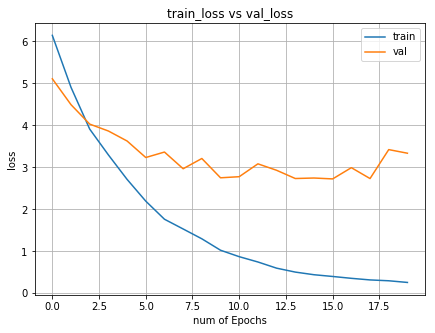

In [90]:
plt.figure(1, figsize=(7, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

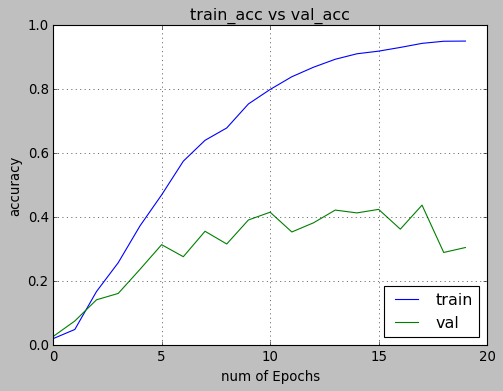

In [91]:
plt.figure(2, figsize=(7, 5))
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train', 'val'], loc=4)
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [129]:
scores = model.evaluate(X_test, y_test, verbose = 10 )
print ( scores )

[3.337762693695675, 0.304635761589404]


### Testing the model on new Test Data

In [121]:
images_array = []
for file in glob.glob('/Users/ujwal/Downloads/testData/*.jpg'):
    
    print("Filenames",file)
    og_image = Image.open(file)
    resized_img = og_image.resize((128, 128), Image.ANTIALIAS)
    single_img_array = np.asarray(resized_img, dtype="uint8")
    images_array.append(single_img_array)

Filenames /Users/ujwal/Downloads/testData/charizard.jpg
Filenames /Users/ujwal/Downloads/testData/Golbat.jpg
Filenames /Users/ujwal/Downloads/testData/beedrill.jpg
Filenames /Users/ujwal/Downloads/testData/Gastly.jpg
Filenames /Users/ujwal/Downloads/testData/Rapidash.jpg
Filenames /Users/ujwal/Downloads/testData/Pikachu.jpg
Filenames /Users/ujwal/Downloads/testData/Tauros.jpg
Filenames /Users/ujwal/Downloads/testData/Eevee.jpg
Filenames /Users/ujwal/Downloads/testData/Mewtwo.jpg
Filenames /Users/ujwal/Downloads/testData/Abra.jpg
Filenames /Users/ujwal/Downloads/testData/Lapras.jpg
Filenames /Users/ujwal/Downloads/testData/Scyther.jpg
Filenames /Users/ujwal/Downloads/testData/Geodude.jpg
Filenames /Users/ujwal/Downloads/testData/Drowzee.jpg
Filenames /Users/ujwal/Downloads/testData/JigglyPUFF!.jpg
Filenames /Users/ujwal/Downloads/testData/Jolteon.jpg
Filenames /Users/ujwal/Downloads/testData/Hitmonlee.jpg
Filenames /Users/ujwal/Downloads/testData/Golduck.jpg
Filenames /Users/ujwal/Downl

In [125]:
X_external_test = np.asarray(images_array)

In [126]:
X_external_test

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [138]:
final_predictions = model.predict(X_external_test)

In [139]:
final_predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [140]:
final_predictions = np.argmax(final_predictions,axis = 1)
final_predictions = pd.Series(final_predictions, name="Label")
overall = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   final_predictions],axis = 1)
overall.to_csv("pokemon_CNN_classifier.csv",index=False)
overall.head(10)

,ImageId,Label
0,1,56.0
1,2,56.0
2,3,134.0
3,4,56.0
4,5,56.0
5,6,56.0
6,7,56.0
7,8,56.0
8,9,134.0
9,10,134.0


In [141]:
pred_classes = model.predict_classes(X_external_test)

In [142]:
pred_classes

array([ 56,  56, 134,  56,  56,  56,  56,  56, 134, 134, 134, 134, 134,
        56, 134,  56, 134, 134,  56, 134, 134, 134, 134, 134, 134,  56])